# Data organizer

Organize some of the jet files; pad them, etc.

In [1]:
import os
from tqdm import tqdm

import numpy as np

from matplotlib import pyplot as plt

In [2]:
# Configuration
plt.rcParams["figure.dpi"] = 80
plt.rcParams["font.family"] = "serif"

In [3]:
data_dir = "/usatlas/atlas01/atlasdisk/users/atlas_wifeng/phys427/top-tagging/data"

In [4]:
jet_files = sorted(os.listdir(f"{data_dir}/jets"))

In [5]:
# Extract jet files
N = len(jet_files)
X = [None] * N
y = [None] * N

In [6]:
for i, file in enumerate(tqdm(jet_files[:N])):
    jet = np.load(f"{data_dir}/jets/{file}")
    X[i] = jet["x"]
    y[i] = jet["y"]

100%|██████████| 987683/987683 [48:21<00:00, 340.35it/s]


## Analyze inputs

Maximum jet size: 212


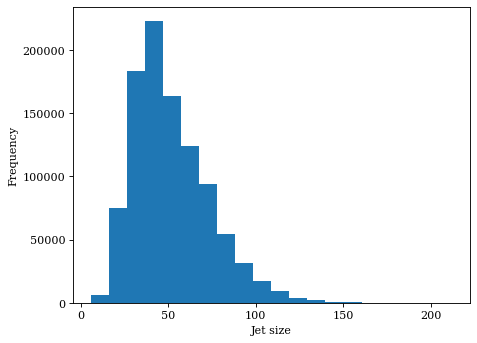

In [12]:
jet_sizes = [jet.shape[0] for jet in X_new]
plt.hist(jet_sizes, bins=20)
plt.xlabel("Jet size")
plt.ylabel("Frequency");

max_jet_size = max(jet_sizes)
print(f"Maximum jet size: {max_jet_size}")

In [13]:
# Pad out everything
for i in tqdm(range(N)):
    pad_required = max_jet_size - X[i].shape[0]    
    X[i] = np.pad(
        X[i],
        pad_width=[(0, pad_required), (0, 0)],
        constant_values=0
    )

100%|██████████| 987683/987683 [01:42<00:00, 9674.07it/s]


In [23]:
# Save this!
np.savez(f"{data_dir}/jets-988K-padded.npz", X=X_np, y=y)